# Joomi Shim

## Research question/interests

Medical expense dataset includes many interesting factors such as smoking status that affect the the amount of personal charges. I think it will be intriguing to find out the correlation between each factor and the causes of high charges to prevent high medical expenses in the future.

To what extent would the factors in the dataset affect the personal medical expense?

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [139]:
df = pd.read_csv('../data/raw/insurance_raw1.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Milestone 3

## Task 1

## Exploratory Data Analysis:

In [140]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

print("Number of rows and columns respectively:", df.shape)
print("Columns in the dataset:", df.columns)

Number of rows and columns respectively: (1338, 7)
Columns in the dataset: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [141]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [142]:
df.nunique(axis=0)

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [143]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Correlation Matrix


<AxesSubplot:>

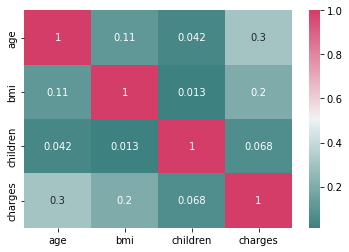

In [144]:
print("Correlation Matrix")
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(190, 0, as_cmap=True))

Coefficient '1' stands for perfect correlation and '0' stands for no correlation (= random). The correlation matrix above shows that there are weak positive relationships among charges and other variables. 

Most coefficients are close to 0, meaning that there are relatively low relationships between the variables. Between charges and age, and charges and bmi, however, you can observe positive correlation of 0.3 and 0.2 respectively.

In [145]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [146]:
df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


<AxesSubplot:xlabel='age', ylabel='bmi'>

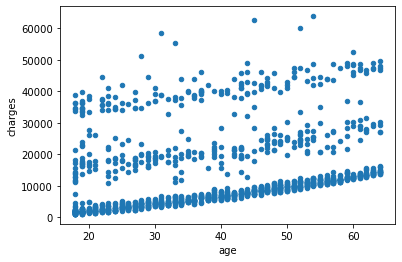

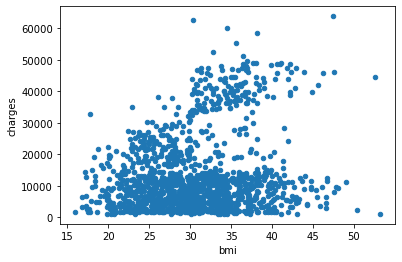

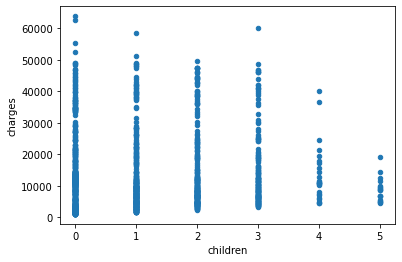

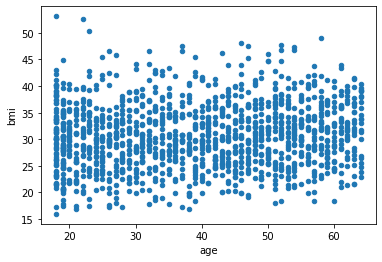

In [147]:
df.plot(kind='scatter', x='age', y='charges')
df.plot(kind='scatter', x='bmi', y='charges')
df.plot(kind='scatter', x='children', y='charges')
df.plot(kind='scatter', x='age', y='bmi')

<AxesSubplot:>

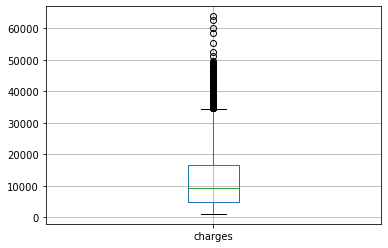

In [148]:
df.boxplot('charges')

From the boxplot above, you can see that there are a number of outliers for charges in the upper range and that most of the charges fall between 0 and $35,000.

<AxesSubplot:ylabel='Frequency'>

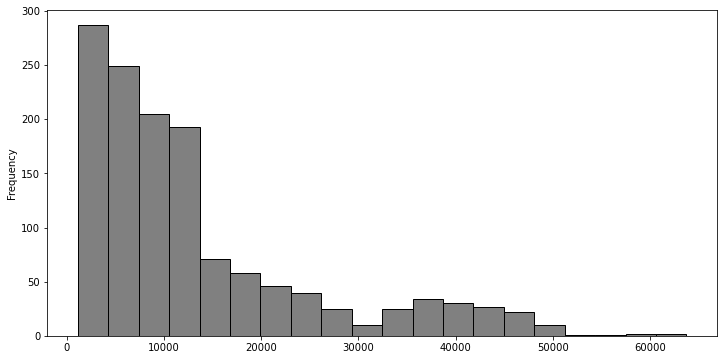

In [149]:
df['charges'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

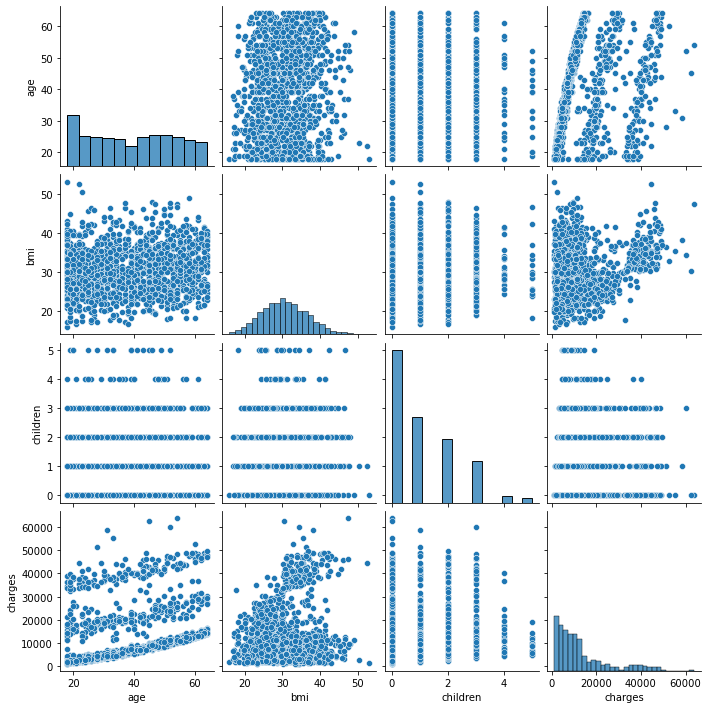

In [150]:
sns.pairplot(df)

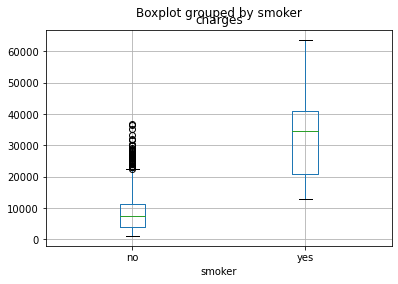

In [162]:
boxplot = df.boxplot(column=['charges'],by="smoker")
boxplot.plot()
plt.show()

## Task 2 & 3

In [175]:
import projectfunction1 as p1

In [176]:
data ='../data/raw/insurance_raw1.csv'
dfu = p1.unprocess(data)
dfu



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
